In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import f1_score
warnings.simplefilter(action='ignore', category=FutureWarning)


In [19]:
df = pd.read_parquet('../data/selected_data.parquet')
df = df.dropna(subset=['Tipo_espectral']) 

In [20]:
#aplicamos un encoder a nuestro dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df:
    df[column] = le.fit_transform(df[column])


In [27]:
# Imprimo las clases del encoder ya que posteriormente necesitaré saber a que otorgó cada valor.
print(le.classes_)

['A' 'B' 'F' 'G' 'K' 'M' 'O']


In [21]:
X = df[['Vmag', 'BTmag','VTmag', 'B-V', 'V-I','Hpmag','(V-I)red', 'd', 'T', 'M_v', 'M_Hip']]
y = df['Tipo_espectral']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314)

### REGRESIÓN LOGÍSTICA

In [6]:
logistic = LogisticRegression(solver='lbfgs', max_iter=3000)
logistic.fit(X_train, y_train)
predictions_LR= logistic.predict(X_test)

logistic.score(X_train, y_train)

/Users/enriquebook/Data_Analysis/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7723727981676392

### RANDOM FOREST

In [7]:
model_RF = RandomForestClassifier(n_estimators=100000, max_depth=6, random_state=41)
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)

model_RF.score(X_train, y_train)


0.8104515460544255

###  K-Nearest-Neighbor

In [8]:
KNN_classifier = KNeighborsClassifier(n_neighbors=14)
KNN_classifier.fit(X_train, y_train)
predictions_KNN = KNN_classifier.predict(X_test)

KNN_classifier.score(X_train, y_train)


0.8278889676610133

### Gradient Boosting


In [9]:
model_GB = GradientBoostingClassifier(min_samples_leaf=5,max_leaf_nodes=5)
model_GB.fit(X_train, y_train)
predictions_GB = model_GB.predict(X_test)

model_GB.score(X_train, y_train)


0.8188498663903583

### XGBoost

In [10]:
model_XGB = XGBClassifier(learning_rate=0.005, use_label_encoder=False, n_estimators=3000, max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=30)

model_XGB.fit(X_train, y_train)
predictions_XGB = model_XGB.predict(X_test)

model_XGB.score(X_train, y_train)

/Users/enriquebook/Data_Analysis/myenv/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.8246577957135846

### Vemos las puntuaciones

In [11]:
print("Logistic Regression: ", logistic.score(X_train, y_train))
print("Random Forest: ", model_RF.score(X_train, y_train))
print("K-Nearest-Neighbor: ", KNN_classifier.score(X_train, y_train))
print("Gradient Boosting: ", model_GB.score(X_train, y_train))
print("XGBoost: ", model_XGB.score(X_train, y_train))
print("Mean: ", (logistic.score(X_train, y_train) + model_RF.score(X_train, y_train) + KNN_classifier.score(X_train, y_train) + model_GB.score(X_train, y_train) + model_XGB.score(X_train, y_train)) / 5)

Logistic Regression:  0.7723727981676392
Random Forest:  0.8104515460544255
K-Nearest-Neighbor:  0.8278889676610133
Gradient Boosting:  0.8188498663903583
XGBoost:  0.8246577957135846
Mean:  0.8108441947974041


### Dibujamos la curva de aprendizaje y vemos la evolución de las puntuaciones de entrenamiento y validación

/Users/enriquebook/Data_Analysis/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/enriquebook/Data_Analysis/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

<module 'matplotlib.pyplot' from '/Users/enriquebook/Data_Analysis/myenv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

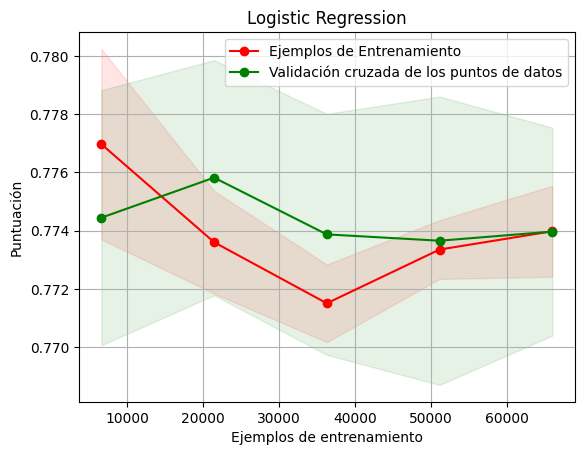

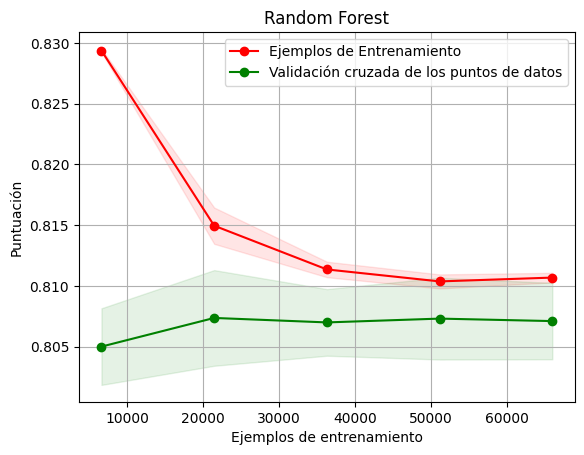

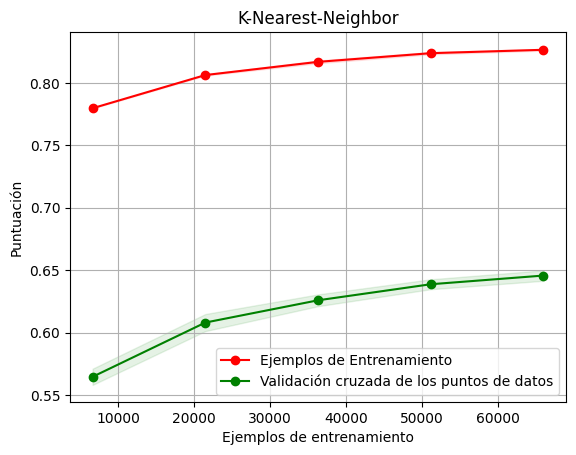

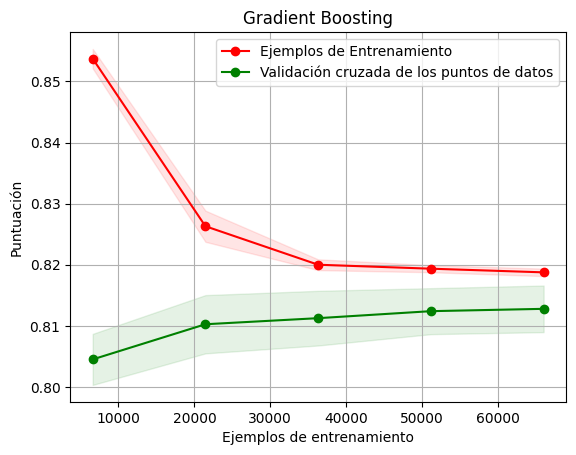

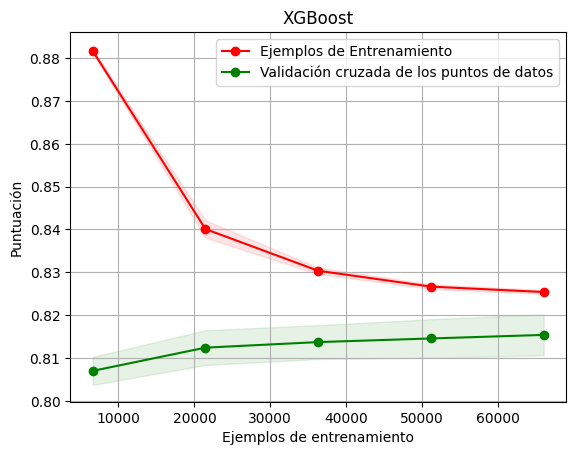

In [12]:
from sklearn.model_selection import learning_curve

learning_curve(logistic, X_train, y_train, cv=10, n_jobs=-1)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Ejemplos de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validación cruzada de los puntos de datos")

    plt.legend(loc="best")
    return plt

plot_learning_curve(logistic, "Logistic Regression", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_RF, "Random Forest", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(KNN_classifier, "K-Nearest-Neighbor", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_GB, "Gradient Boosting", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_XGB, "XGBoost", X_train, y_train, cv=10, n_jobs=-1)
     

In [13]:
# Ahora guardamos la información en wandb.

import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: quiquevasallo. Use `wandb login --relogin` to force relogin


True

In [14]:
# iniciamos un proyecto en wandb
import wandb
wandb.init(project="Hipparcos 2")

In [15]:
# Subimos las puntuaciones de nuestros modelos y así podremos contrastar más adelante qué modelo presenta una mejor precisión

wandb.log({'LgR': logistic.score(X_test, y_test)})
wandb.log({'RanFor': model_RF.score(X_test, y_test)})
wandb.log({'KNN': KNN_classifier.score(X_test, y_test)})
wandb.log({'GrBo': model_GB.score(X_test, y_test)})
wandb.log({'XGB': model_XGB.score(X_test, y_test)})

In [2]:
import pickle 

In [18]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/hip_2_XGB.pkl', 'wb') as f:
    pickle.dump(model_XGB, f)

## Probando las predicciones del modelo XGBoost

In [15]:
# Cargar modelo guardado
with open('../output/hip_2_XGB.pkl', 'rb') as f:
    model_XGB = pickle.load(f)
Vmag = 5 
BTmag = 3
B_V = 4
V_I = 2.5
VTmag = -1.5
Hpmag = -1.25
V_I_red = 3
d = 100
T = 8000
M_v = 6
M_Hip = 4

# Seleccionar las mismas características que se utilizaron para entrenar el modelo
X_new = pd.DataFrame([[Vmag, BTmag, VTmag, B_V, V_I, Hpmag, V_I_red, d, T, M_v, M_Hip]], columns=['Vmag', 'BTmag', 'VTmag', 'B-V', 'V-I', 'Hpmag', '(V-I)red', 'd', 'T', 'M_v', 'M_Hip'])



# Hacer predicciones en los nuevos datos utilizando el modelo cargado
y_pred = model_XGB.predict(X_new)



In [17]:
print(y_pred)

[1]


In [26]:
# Hacer predicciones en los datos de prueba utilizando el modelo cargado
from sklearn.metrics import f1_score
y_pred = model_XGB.predict(X_test)

# Calcular la puntuación F1
f1 = f1_score(y_test, y_pred, average='micro')

# Mostrar la puntuación F1
print('F1 score:', f1)

F1 score: 0.8140607602990299
